In [1]:
from obliquetree import Regressor
from obliquetree.utils import visualize_tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 42

In [2]:
X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
reg = Regressor(use_oblique=True, max_depth=3, random_state=RANDOM_STATE, n_pair=2)

reg.fit(X_train, y_train)

train_pred = reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

test_pred = reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print(train_mse, test_mse)

0.5024369081217311 0.5103014705031034


In [4]:
reg_sk = DecisionTreeRegressor(max_depth=3, random_state=RANDOM_STATE)

reg_sk.fit(X_train, y_train)

train_pred = reg_sk.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

test_pred = reg_sk.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print(train_mse, test_mse)

0.618837752586643 0.640829077514131


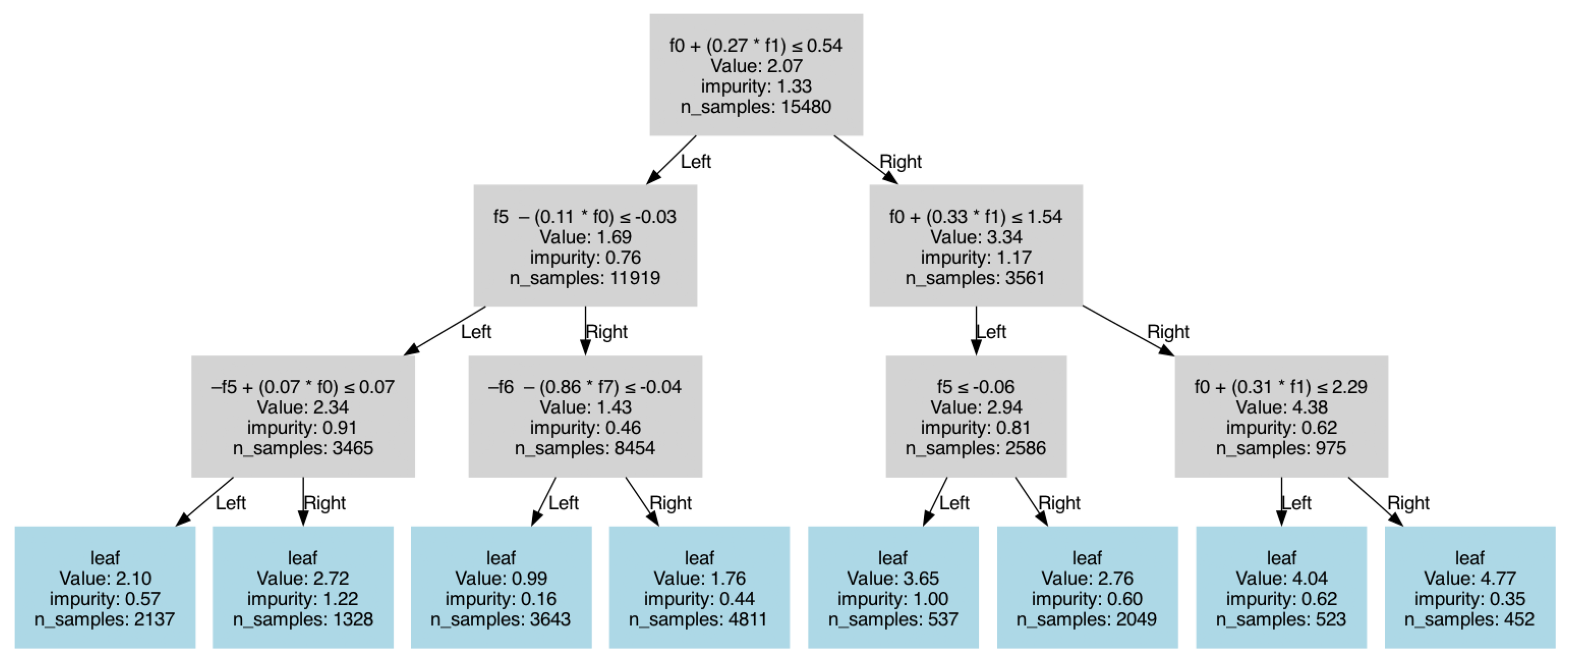

In [5]:
visualize_tree(reg)